Stock Market Analysis Project

Improting Libraries

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pyfolio as pf
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
from datetime import datetime

d:\COLLEGE\8th\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


collecting the data

In [2]:
df = yf.download('AAPL', start='2021-01-01', end='2021-12-31')

[*********************100%***********************]  1 of 1 completed


In [3]:
tickers_list = ['AAPL']

dataa = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
     dataa[ticker] = yf.download(ticker, start='2021-01-01', end='2021-12-31')['Adj Close']


[*********************100%***********************]  1 of 1 completed


creating a portfolio of the company

d:\COLLEGE\8th\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
d:\COLLEGE\8th\lib\site-packages\pyfolio\plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2021-01-05
End date,2021-12-30
Total months,11
,Backtest
Annual return,38.9%
Cumulative returns,38.6%
Annual volatility,25.1%
Sharpe ratio,1.44
Calmar ratio,2.09
Stability,0.70
Max drawdown,-18.6%


d:\COLLEGE\8th\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


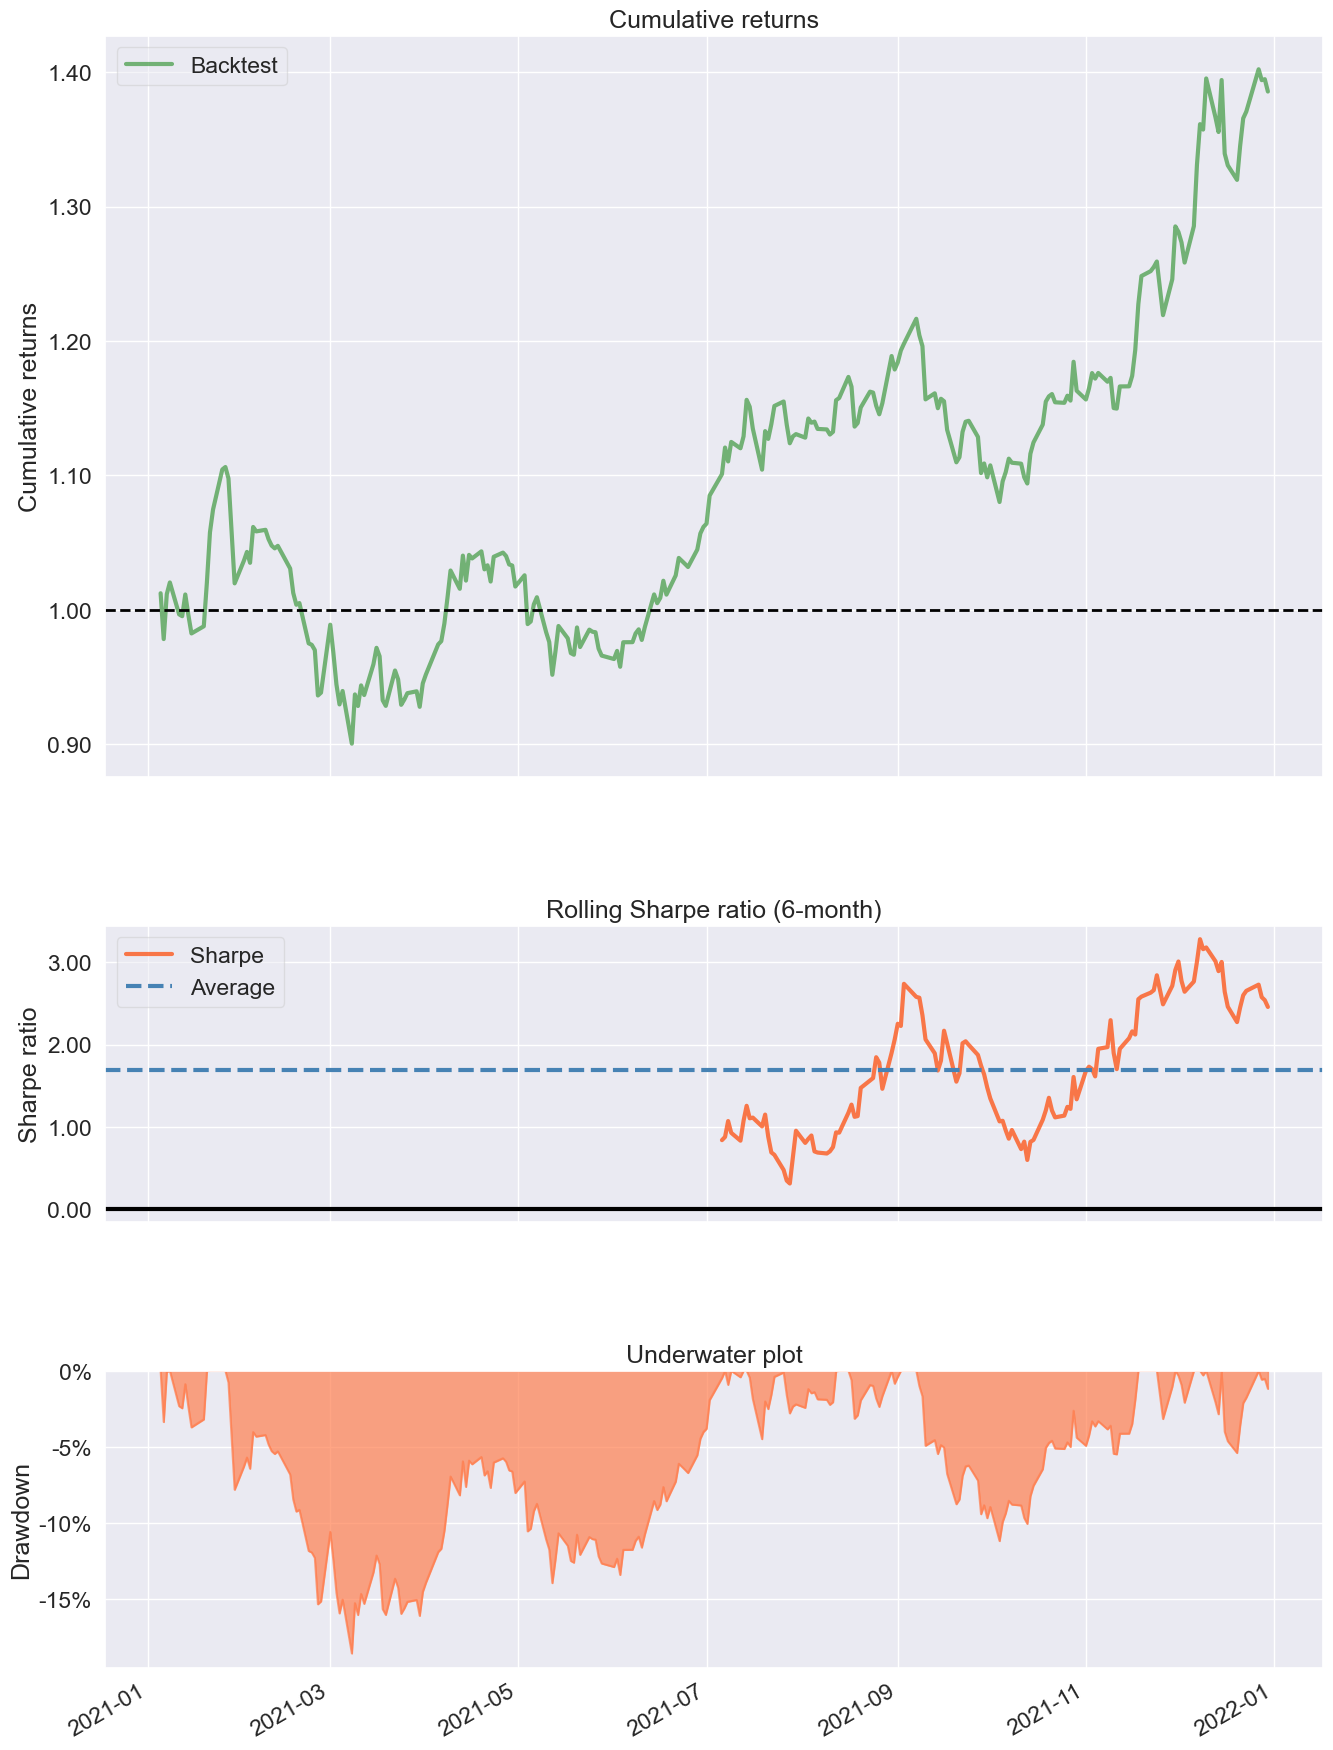

In [4]:
# Compute the returns of individual stocks and then compute the daily mean returns.
# The mean return is the daily portfolio returns with the above four stocks.
dataa = dataa.pct_change().dropna().mean(axis=1)

# Get the full tear sheet
pf.create_simple_tear_sheet(dataa)


In [5]:
df['return'] = np.log(df.Close.pct_change() + 1)

In [6]:
def lagit(df , lags):
    names = []
    for i in range(1,lags + 1 ):
        df['Lag_'+str(i)] = df['return'].shift(i)
        names.append('Lag_'+str(i))
    return names     

In [7]:
lagnames = lagit(df,5)

printing the Raw data sheet

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,return,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.680008,143301900,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,128.889999,131.740005,128.429993,131.009995,129.258591,97664900,0.012288,NaN,NaN,NaN,NaN,NaN
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.907555,155088000,-0.034241,0.012288,NaN,NaN,NaN,NaN
2021-01-07,128.360001,131.630005,127.860001,130.919998,129.169815,109578200,0.033554,-0.034241,0.012288,NaN,NaN,NaN
2021-01-08,132.429993,132.630005,130.229996,132.050003,130.284729,105158200,0.008594,0.033554,-0.034241,0.012288,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,174.995605,68356600,0.003637,0.015203,0.018907,-0.008155,-0.006523,-0.040055
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.016129,74919600,0.022715,0.003637,0.015203,0.018907,-0.008155,-0.006523
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.983688,79144300,-0.005784,0.022715,0.003637,0.015203,0.018907,-0.008155


In [9]:
df.dropna(inplace=True)

In [10]:
model = LinearRegression()
model.fit(df[lagnames],df['return'])

LinearRegression()

In [11]:
df['prediction_LR'] = model.predict(df[lagnames])
df['direction_LR'] = [1 if i > 0 else -1 for i in df.prediction_LR ]
df['strat_LR'] = df['direction_LR'] * df['return']

In [12]:
np.exp(df[['return' , 'strat_LR']].sum())

return      1.381610
strat_LR    1.710049
dtype: float64

ploting the data withour predictions added

<Axes: xlabel='Date'>

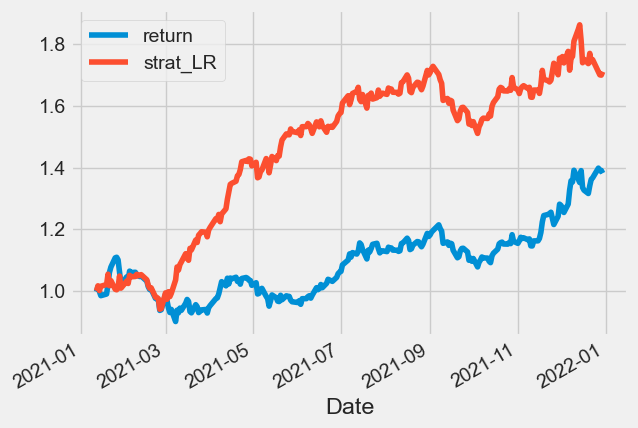

In [13]:
np.exp(df[['return','strat_LR']].cumsum()).plot()

In [14]:
train,test = train_test_split(df,shuffle=False,test_size=0.1 , random_state=0)

In [15]:
train = train.copy()
test = test.copy()
model = LinearRegression()
model.fit(train[lagnames],train['return'])

LinearRegression()

In [16]:
test['prediction_LR'] = model.predict(test[lagnames])
test['direction_LR'] = [1 if i > 0 else -1 for i in test.prediction_LR ]
test['strat_LR'] = test['direction_LR'] * test['return']

prediction model trained

In [17]:
np.exp(test[['return' , 'strat_LR']].sum())

return      1.104021
strat_LR    0.978186
dtype: float64

In [18]:
(test['direction_LR'].diff() != 0).value_counts()

True     18
False     7
Name: direction_LR, dtype: int64

plotting the Linear Regression model

<Axes: xlabel='Date'>

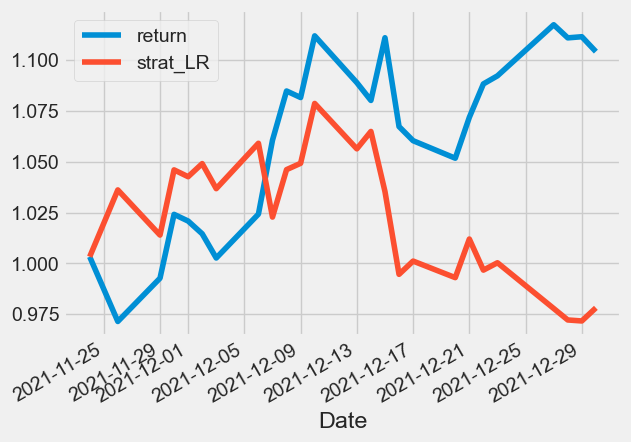

In [19]:
np.exp(test[['return','strat_LR']].cumsum()).plot()

data sheet with predictions of LR model 

In [20]:
test

,Open,High,Low,Close,Adj Close,Volume,return,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR,direction_LR,strat_LR
Date,,,,,,,,,,,,,,,
2021-11-24,160.750000,162.139999,159.639999,161.940002,160.760101,69463600,0.003278,0.002419,0.002923,0.016834,0.028136,0.016356,0.000375,1,0.003278
2021-11-26,159.570007,160.449997,156.360001,156.809998,155.667480,76959800,-0.032191,0.003278,0.002419,0.002923,0.016834,0.028136,-0.001054,-1,0.032191
2021-11-29,159.369995,161.190002,158.789993,160.240005,159.072495,88748200,0.021638,-0.032191,0.003278,0.002419,0.002923,0.016834,-0.001627,-1,-0.021638
2021-11-30,159.990005,165.520004,159.919998,165.300003,164.095627,174048100,0.031089,0.021638,-0.032191,0.003278,0.002419,0.002923,0.001464,1,0.031089
2021-12-01,167.479996,170.300003,164.529999,164.770004,163.569489,152052500,-0.003211,0.031089,0.021638,-0.032191,0.003278,0.002419,0.004465,1,-0.003211
2021-12-02,158.740005,164.199997,157.800003,163.759995,162.566833,136739200,-0.006149,-0.003211,0.031089,0.021638,-0.032191,0.003278,-0.005194,-1,0.006149
2021-12-03,164.020004,164.960007,159.720001,161.839996,160.660828,118023100,-0.011794,-0.006149,-0.003211,0.031089,0.021638,-0.032191,0.004687,1,-0.011794
2021-12-06,164.289993,167.880005,164.279999,165.320007,164.115479,107497000,0.021275,-0.011794,-0.006149,-0.003211,0.031089,0.021638,0.001733,1,0.021275
2021-12-07,169.080002,171.580002,168.339996,171.179993,169.932785,120405400,0.034833,0.021275,-0.011794,-0.006149,-0.003211,0.031089,-0.002227,-1,-0.034833


data sorting for the model

In [21]:
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

233

scaling the data to fit the model

In [22]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.19446619],
       [0.2271377 ],
       [0.19618576],
       [0.16851647],
       [0.17930281],
       [0.24495854],
       [0.32061895],
       [0.35501026],
       [0.41519458],
       [0.41894642],
       [0.40175077],
       [0.32405808],
       [0.2438644 ],
       [0.27794276],
       [0.29123033],
       [0.27481634],
       [0.32874783],
       [0.31889938],
       [0.32124437],
       [0.30717514],
       [0.29748317],
       [0.29341885],
       [0.29717046],
       [0.2630921 ],
       [0.22635603],
       [0.20869167],
       [0.21119266],
       [0.15069563],
       [0.14850711],
       [0.14053459],
       [0.07237763],
       [0.07659843],
       [0.17867751],
       [0.13693922],
       [0.08910422],
       [0.05893382],
       [0.07909954],
       [0.        ],
       [0.07394084],
       [0.05658907],
       [0.08754101],
       [0.07300294],
       [0.11927461],
       [0.14397372],
       [0.13131157],
       [0.06518678],
       [0.05674531],
       [0.109

training the model

In [23]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.19446619, 0.2271377 , 0.19618576, 0.16851647, 0.17930281,
       0.24495854, 0.32061895, 0.35501026, 0.41519458, 0.41894642,
       0.40175077, 0.32405808, 0.2438644 , 0.27794276, 0.29123033,
       0.27481634, 0.32874783, 0.31889938, 0.32124437, 0.30717514,
       0.29748317, 0.29341885, 0.29717046, 0.2630921 , 0.22635603,
       0.20869167, 0.21119266, 0.15069563, 0.14850711, 0.14053459,
       0.07237763, 0.07659843, 0.17867751, 0.13693922, 0.08910422,
       0.05893382, 0.07909954, 0.        , 0.07394084, 0.05658907,
       0.08754101, 0.07300294, 0.11927461, 0.14397372, 0.13131157,
       0.06518678, 0.05674531, 0.10989524, 0.09660779, 0.05830851,
       0.06612468, 0.07581676, 0.07863059, 0.05533845, 0.09051119,
       0.10379864, 0.14913242, 0.1539784 , 0.18039707, 0.21885258])]
[0.2601219176507239]

[array([0.19446619, 0.2271377 , 0.19618576, 0.16851647, 0.17930281,
       0.24495854, 0.32061895, 0.35501026, 0.41519458, 0.41894642,
       0.40175077, 0.32405808, 0.243

In [24]:
x_train.shape #the third dimension should be changed here to accomodate for sentiment analysis

(173, 60, 1)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

173/173 [==============================] - 11s 36ms/step - loss: 0.0129


Outputting the model trained summary for checking the accuracy

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


Test data for the model prediction

In [27]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 2s 2s/step


12.041100966586868

plotting the test data

C:\Users\HP\AppData\Local\Temp\ipykernel_15628\250547354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


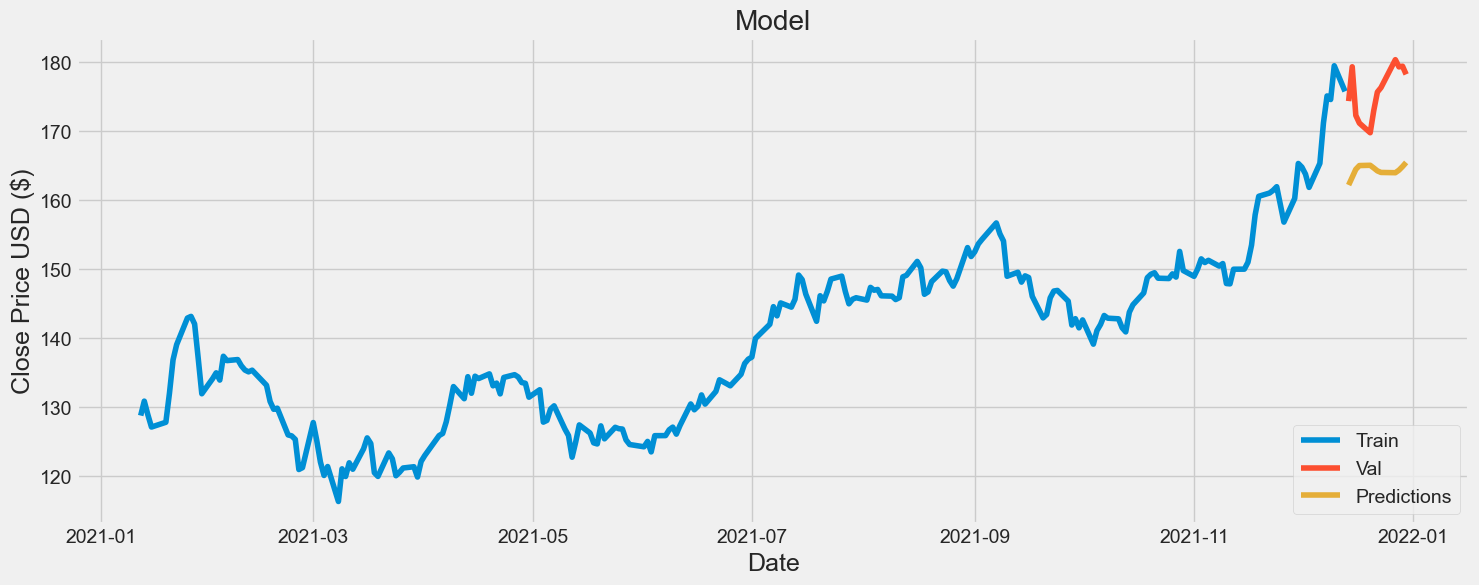

In [28]:
 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Tabular data of the test data

In [29]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-12-14,174.330002,162.177856
2021-12-15,179.300003,163.310715
2021-12-16,172.259995,164.453323
2021-12-17,171.139999,164.998642
2021-12-20,169.750000,165.038895
2021-12-21,172.990005,164.646149
2021-12-22,175.639999,164.227615
2021-12-23,176.279999,164.002594
2021-12-27,180.330002,163.963531


End of code